In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## DATA LOADING AND PREPROCESSING

In [2]:
dataset= pd.read_csv('WELFake_Dataset.csv')

In [3]:
df = dataset
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [4]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label          int64
dtype: object

<Axes: xlabel='label', ylabel='Count'>

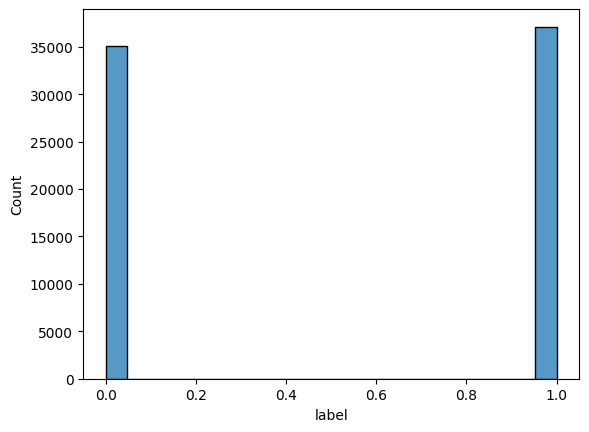

In [5]:
sns.histplot(data=df["label"])

In [6]:
df.dropna()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [7]:
data=dataset

In [8]:
dataset.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [9]:
dataset.shape

(72134, 4)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


### CHECKING FOR DUPLICATES AND NULL

In [11]:
print(dataset.duplicated().sum())

0


In [12]:
dataset.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

### DROPPING NULL VALUES

In [13]:
dataset.dropna(inplace=True)

In [14]:
dataset.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [15]:
dataset.shape

(71537, 4)

In [16]:
dataset['title'].value_counts()

title
Factbox: Trump fills top jobs for his administration                                                  14
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence     8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                       8
Factbox: Contenders for senior jobs in Trump's administration                                          8
Michael Moore Owes Me $4.99                                                                            7
                                                                                                      ..
Population of Vertebrate Animals Fell 58% From 1970-2012                                               1
Italy's Renzi pledges to hike budget deficit if he wins election                                       1
Motion Picture Academy, After Diversifying, Keeps Leadership Intact - The New York Times               1
Donald Trump, Delhi, Theresa May: Your Monday Bri

In [17]:
dataset['label'].value_counts()/len(dataset) *100

label
1    51.035129
0    48.964871
Name: count, dtype: float64

In [18]:
copy_dataset=dataset.copy()

## removing stopwords

In [19]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package stopwords to /home/anmol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
stop_words = set(stopwords.words('english'))
#lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]','' ,text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)

copy_dataset['title'] = copy_dataset['title'].apply(clean_text)
copy_dataset['text'] = copy_dataset['text'].apply(clean_text)

In [21]:
copy_dataset.head()

,Unnamed: 0,title,text,label
0,0,law enforcement high alert following threats c...,comment expected barack obama members fyf911 f...,1
2,2,unbelievable obamas attorney general says char...,demonstrators gathered last night exercising c...,1
3,3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...,0
4,4,satan 2 russia unvelis image terrifying new su...,rs28 sarmat missile dubbed satan 2 replace ss1...,1
5,5,time christian group sues amazon splc designat...,say one time someone sued southern poverty law...,1


## PLOTTING IN MATPLOT

<Axes: xlabel='label', ylabel='count'>

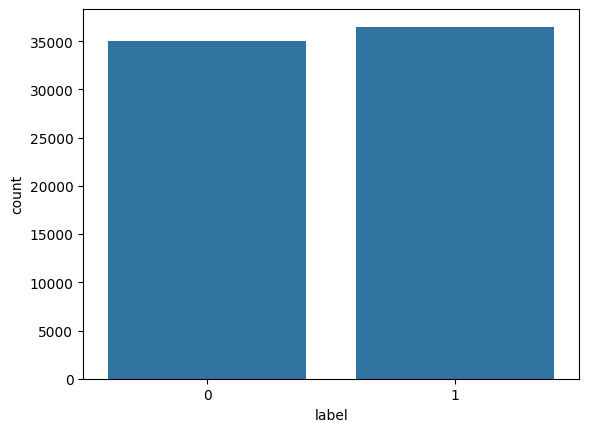

In [22]:
sns.countplot(x='label', data=dataset)

## Counting no. of words in title column and text column

In [23]:
df_word_count = pd.DataFrame({'title_word_count': copy_dataset['title'].apply(lambda x: len(x.split(' ')))
                      ,'text_word_count':copy_dataset['text'].apply(lambda x: len(x.split(' ')))
                      ,'label':copy_dataset['label']})
df_word_count.head()

,title_word_count,text_word_count,label
0,13,463,1
2,14,21,1
3,13,743,0
4,12,201,1
5,9,142,1


In [24]:
## occurence of words
def occurence_of_words(df):
  for t in df['text']:
    token= t.split()


### title

<Axes: xlabel='title_word_count', ylabel='Count'>

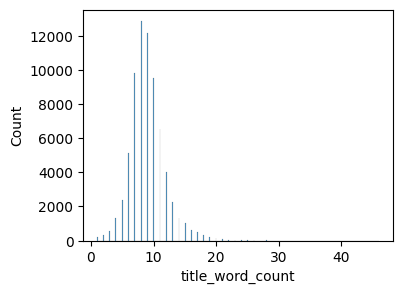

In [25]:
plt.figure(figsize=(4,3))
sns.histplot(df_word_count['title_word_count'])

## max and min  words in title

In [26]:
print(f'max words in title: {df_word_count["title_word_count"].max()}')
print(f'min words in title: {df_word_count["title_word_count"].min()}')
print(f'mean words in title: {df_word_count["title_word_count"].mean()}')


max words in title: 46
min words in title: 1
mean words in title: 9.045668674951424


### text

### max and min words in text


In [27]:
print(f'max words in text column: {df_word_count["text_word_count"].max()}')
print(f'min words in text column: {df_word_count["text_word_count"].min()}')
print(f'mean words in text column: {df_word_count["text_word_count"].mean()}')

max words in text column: 12446
min words in text column: 1
mean words in text column: 309.987516949271


<Axes: xlabel='text_word_count', ylabel='Count'>

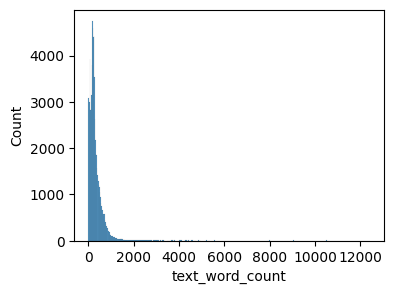

In [28]:
plt.figure(figsize=(4,3))
sns.histplot(df_word_count['text_word_count'])

## text row in which words count is less than 10

In [29]:
df_word_count[df_word_count['text_word_count']<10].count()

title_word_count    1458
text_word_count     1458
label               1458
dtype: int64

In [30]:
df_word_count[df_word_count['title_word_count']<5].count()

title_word_count    2456
text_word_count     2456
label               2456
dtype: int64

## checking if less word count means false information

In [31]:
df_word_count[df_word_count['title_word_count']<10]['label'].value_counts()

label
0    26191
1    18607
Name: count, dtype: int64

In [32]:
df_word_count[df_word_count['text_word_count']<10]['label'].value_counts()

label
1    1389
0      69
Name: count, dtype: int64

In [33]:
df_word_count[df_word_count['text_word_count']>=1000]['label'].value_counts()

label
1    1131
0     786
Name: count, dtype: int64

In [34]:
df_word_count.corr()

,title_word_count,text_word_count,label
title_word_count,1.000000,-0.032647,0.215349
text_word_count,-0.032647,1.000000,-0.069996
label,0.215349,-0.069996,1.000000


## to check correlation  using tfidf vectorize

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Tfidf= TfidfVectorizer(max_features=5000)
#x= tfidf.fit_transform(copy_dataset['title']).toarray()
#x2= tfidf.fit_transform(copy_dataset['text']).toarray()
y = copy_dataset['label']

In [36]:
x= Tfidf.fit_transform(copy_dataset['title'])
x2= Tfidf.fit_transform(copy_dataset['text'])

In [37]:
x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 535093 stored elements and shape (71537, 5000)>

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.2, random_state=42)

In [39]:
model = LogisticRegression(max_iter = 500)
model.fit(x_train, y_train)
model.fit(x2_train,y2_train)

pred1= model.predict(x_test)
pred2= model.predict(x2_test)

print('accuracy score when using title column :',accuracy_score(y_test, pred1))
print('accuracy score when using text column :',accuracy_score(y2_test, pred2))

accuracy score when using title column : 0.5001397819401733
accuracy score when using text column : 0.950796757058988


In [40]:
import joblib

# Save trained model
joblib.dump(model, "fake_news_model.pkl")

# Save TF-IDF vectorizer
joblib.dump(Tfidf, "vectorizer.pkl")

print("Model and vectorizer saved successfully")


Model and vectorizer saved successfully


In [41]:
import pickle

# Save
with open("fake_newsmodel", "wb") as f:
    pickle.dump(model, f)
    print("model Saved")

# Load
# with open("fake_newsmodel.pkl", "rb") as f:
#     model = pickle.load(f)

# y_pred = clf_loaded.predict(X_test)



model Saved


In [42]:
import os
os.listdir()


['.ipynb_checkpoints',
 'fake_newsmodel',
 'fake_news_model.pkl',
 'flask Test.ipynb',
 'vectorizer.pkl',
 'WELFake_Dataset.csv',
 'WelFlake.ipynb',
 'Wel_fake_clean.csv']

# Flask Connection

In [28]:
import os
os.listdir()


['fake_news_model.pkl',
 'flask Test.ipynb',
 'Wel_fake_clean.csv',
 'do.html',
 'WelFlake2.ipynb',
 'vectorizer.pkl',
 'fake_newsmodel',
 'WELFake_Dataset.csv',
 '.ipynb_checkpoints',
 'script.js',
 'app.py',
 'WelFlake.ipynb',
 'do.css']

In [44]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route("/api/processInput", methods=["POST"])
def process_input():
    data = request.get_json()
    news_article = data.get("input", "")

    # 🔹 Save input to a file
    with open("input_data.txt", "a", encoding="utf-8") as f:
        f.write(news_article + "\n---\n")

    # 🔹 Later you can load this file for your model
    return jsonify({"result": "Saved input successfully!"})

if __name__ == "__main__":
    app.run(port=5001, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\ASUS\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [79]:
pip install flask joblib scikit-learn



   ---------------------------------------- 0/4 [werkzeug]
   ---------------------------------------- 0/4 [werkzeug]
   ---------------------------------------- 0/4 [werkzeug]
   ---------------------------------------- 0/4 [werkzeug]
   ---------------------------------------- 0/4 [werkzeug]
   ---------------------------------------- 0/4 [werkzeug]
   ---------------------------------------- 0/4 [werkzeug]
   ---------------------------------------- 0/4 [werkzeug]
   ---------- ----------------------------- 1/4 [itsdangerous]
   -------------------- ------------------- 2/4 [blinker]
   ------------------------------ --------- 3/4 [flask]
   ------------------------------ --------- 3/4 [flask]
   ------------------------------ --------- 3/4 [flask]
   ------------------------------ --------- 3/4 [flask]
   ---------------------------------------- 4/4 [flask]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# from flask import Flask, request, jsonify
# import joblib

# app = Flask(__name__)


# @app.route("/processInput", methods=["POST"])
# def process_input():
#     data = request.json
#     text = data.get("input")
#     return jsonify({"result": f"Processed: {text}"})

# if __name__ == "__main__":
#     app.run(debug=True, port=5001, use_reloader=False)

## WORD COUNT

In [42]:
copy_dataset.head()

,Unnamed: 0,title,text,label
0,0,law enforcement high alert following threats c...,comment expected barack obama members fyf911 f...,1
2,2,unbelievable obamas attorney general says char...,demonstrators gathered last night exercising c...,1
3,3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...,0
4,4,satan 2 russia unvelis image terrifying new su...,rs28 sarmat missile dubbed satan 2 replace ss1...,1
5,5,time christian group sues amazon splc designat...,say one time someone sued southern poverty law...,1


In [43]:
new_df = copy_dataset[copy_dataset['text'].apply(lambda x: len(x.split(' ')) <2000)]

In [44]:
new_df.reset_index(drop=True, inplace=True)

In [45]:
new_df['text'].apply(lambda x: len(x.split(' '))).max()

1996

In [46]:
new_df['text'].apply(lambda x: len(x.split(' '))).min()

1

In [47]:
new_df.head()

,Unnamed: 0,title,text,label
0,0,law enforcement high alert following threats c...,comment expected barack obama members fyf911 f...,1
1,2,unbelievable obamas attorney general says char...,demonstrators gathered last night exercising c...,1
2,3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...,0
3,4,satan 2 russia unvelis image terrifying new su...,rs28 sarmat missile dubbed satan 2 replace ss1...,1
4,5,time christian group sues amazon splc designat...,say one time someone sued southern poverty law...,1


In [48]:
new_df.loc[0,'text']

'comment expected barack obama members fyf911 fukyoflag blacklivesmatter movements called lynching hanging white people cops encouraged others radio show tuesday night turn tide kill white people cops send message killing black people americaone fyoflag organizers called sunshine radio blog show hosted texas called sunshine fing opinion radio show snapshot fyf911 lolatwhitefear twitter page 953 pm shows urging supporters call fyf911 tonight continue dismantle illusion white snapshot twitter radio call invite fyf911the radio show aired 1000 pm eastern standard timeduring show callers clearly call lynching killing white peoplea 239 minute clip radio show heard provided breitbart texas someone would like referred hannibal already received death threats result interrupting fyf911 conference callsan unidentified black man said mother fkers start fing like us bunch niers takin one us roll said cause already roll gangs anyway six seven black mother fckers see white person lynch ass let turn t

## checking

In [49]:
platform_list=['facebook','instagram','twitter','reddit','tiktok']

# platform_count ={platform: 0 for platform in platform_list}']

# check=pd.DataFrame(columns=['platform'])

# matched=[]
# for i in range(10):
#   tokens=new_df.loc[i,'text'].split()
#   temp=[]
#   for t in tokens:
#     if t in platform_list and t not in temp:
#       temp.append(t)
#     else:
#       continue
#   matched.append(','.join(temp))
# check['platform']=matched



In [50]:
platform_list=['facebook','instagram','twitter','reddit','tiktok']

def find_platform(text):
  tokens= text.split()
  temp=[]
  for t in tokens:
     if t in platform_list and t not in temp:
        temp.append(t)
  return ','.join(temp)
new_df['platform']=new_df['text'].apply(find_platform)


C:\Users\DASHANAN RAVANA786\AppData\Local\Temp\ipykernel_12996\2888813652.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['platform']=new_df['text'].apply(find_platform)


In [51]:
new_df['platform'].value_counts()

platform
                                     58063
twitter                               7710
facebook                              2814
facebook,twitter                      1016
twitter,facebook                       761
instagram                              231
reddit                                 106
instagram,twitter                       73
twitter,instagram                       58
reddit,twitter                          41
facebook,twitter,instagram              40
facebook,instagram                      32
twitter,facebook,instagram              31
instagram,facebook                      23
facebook,instagram,twitter              20
twitter,reddit                          19
instagram,facebook,twitter              17
instagram,twitter,facebook              12
reddit,facebook                         10
twitter,instagram,facebook               7
reddit,twitter,facebook                  6
facebook,reddit                          5
twitter,reddit,facebook                  5
fa

In [52]:
new_df.columns

Index(['Unnamed: 0', 'title', 'text', 'label', 'platform'], dtype='object')

In [53]:
platform_label_count = new_df.groupby(['platform', 'label']).size()
print(platform_label_count)
platform_label_count.to_csv('platform_label_count.csv')

platform                    label
                            0        28246
                            1        29817
facebook                    0          900
                            1         1914
facebook,instagram          0           16
                                     ...  
twitter,instagram,facebook  1            1
twitter,reddit              0            3
                            1           16
twitter,reddit,facebook     0            3
                            1            2
Length: 61, dtype: int64


In [54]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

In [55]:
platform_label_count

platform                           label
                                   0        28246
                                   1        29817
facebook                           0          900
                                   1         1914
facebook,instagram                 0           16
                                   1           16
facebook,instagram,twitter         0           13
                                   1            7
facebook,reddit                    0            1
                                   1            4
facebook,reddit,twitter            0            3
                                   1            2
facebook,twitter                   0          441
                                   1          575
facebook,twitter,instagram         0           20
                                   1           20
facebook,twitter,instagram,reddit  0            1
facebook,twitter,reddit            0            2
                                   1            2
instagram

##  USING SUMMARIZER

In [22]:
new_copy = dataset.copy()

In [7]:
new_copy=pd.read_csv('Wel_fake_clean.csv')

In [4]:
new_copy.head()

,Unnamed: 0,title,text,label,platform,news_source
0,0,Trump choice for Russia ambassador: 'No questi...,washington (reuters) - former utah governor jo...,0,NaN,NaN
1,1,Speed up Brexit transition talks or deal will ...,london (reuters) - british finance minister ph...,0,NaN,NaN
2,2,The Wild Ideas You Missed While Donald Trump W...,"after five republican debates, most americans ...",0,NaN,NaN
3,3,WATCH: Chris Cuomo SHREDS Kellyanne Conway Fo...,when a charitable foundation offers access t...,1,NaN,cnn
4,4,Controversial Dakota pipeline to go ahead afte...,washington/houston (reuters) - the u.s. army w...,0,NaN,NaN


In [5]:
new_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   15000 non-null  int64 
 1   title        15000 non-null  object
 2   text         14833 non-null  object
 3   label        15000 non-null  int64 
 4   platform     2331 non-null   object
 5   news_source  781 non-null    object
dtypes: int64(2), object(4)
memory usage: 703.3+ KB


In [6]:
new_copy = new_copy[new_copy['text'].apply(lambda x: len(x.split(' '))<2000)]

AttributeError: 'float' object has no attribute 'split'

In [ ]:
new_copy['text'].apply(lambda x: len(x.split(' '))).max()

In [27]:
new_copy.head(2)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1


### cleaning for summarization

In [28]:
import re

In [29]:
def clean_text_for_summarization(text):
    # Encoding fix
    text = text.encode('utf-8', errors ='ignore').decode('utf-8')
    text = text.lower()
    text = re.sub(r'[&\$%]','', text) # removing unwanted symbols but keeping punctuation
    text = re.sub(r'[\n\t]',' ', text) # replacing newline tabs with space
    text = re.sub(r'[\s+]',' ',text).strip() # removing trailing spaces
    return text

In [30]:
new_copy['text'] = new_copy['text'].apply(clean_text_for_summarization)

In [31]:
new_copy.reset_index(drop=True, inplace=True)

In [32]:
new_copy.drop('Unnamed: 0',axis=1,inplace=True)

### Feature extract 

In [33]:
platform_list=['facebook','instagram','twitter','reddit','tiktok']

def find_platform(text):
  tokens= text.split()
  temp=[]
  for t in tokens:
     if t in platform_list and t not in temp:
        temp.append(t)
  return ','.join(temp)
new_copy['platform']=new_copy['text'].apply(find_platform)


In [34]:
news_source=['bbc','ndtv','cnn','medium','times of india']
def find_source(text):
    tokens=text.split()
    temp=[]
    for t in tokens:
        if t in news_source and t not in temp:
            temp.append(t)
    return ','.join(temp)
new_copy['news_source']= new_copy['text'].apply(find_source)

In [35]:
new_copy['news_source'].value_counts()

news_source
              66390
cnn            3001
bbc             436
medium          173
cnn,bbc          15
bbc,cnn           9
cnn,medium        8
ndtv              7
medium,cnn        4
bbc,medium        3
ndtv,cnn          1
cnn,ndtv          1
Name: count, dtype: int64

In [36]:
new_copy['platform'].value_counts()

platform
                                     59536
twitter                               6388
facebook                              2660
facebook,twitter                       542
twitter,facebook                       343
instagram                              237
reddit                                  96
instagram,twitter                       43
twitter,instagram                       40
reddit,twitter                          33
facebook,instagram                      23
instagram,facebook                      20
instagram,facebook,twitter              14
facebook,twitter,instagram              13
twitter,reddit                          12
reddit,facebook                          7
facebook,reddit                          7
instagram,twitter,facebook               7
twitter,instagram,facebook               6
twitter,facebook,instagram               6
facebook,instagram,twitter               4
twitter,reddit,facebook                  3
facebook,twitter,reddit                  2
fa

In [37]:
(new_copy['platform']=="").sum()

np.int64(59536)

In [38]:
new_copy['platform'].replace("",'None', inplace=True)

C:\Users\DASHANAN RAVANA786\AppData\Local\Temp\ipykernel_20804\4199736919.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_copy['platform'].replace("",'None', inplace=True)


In [39]:
new_copy['news_source'].replace("",'None', inplace=True)

C:\Users\DASHANAN RAVANA786\AppData\Local\Temp\ipykernel_20804\1509669248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_copy['news_source'].replace("",'None', inplace=True)


In [40]:
new_copy.head()

,title,text,label,platform,news_source
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,no comment is expected from barack obama membe...,1,twitter,None
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"now, most of the demonstrators gathered last n...",1,None,None
2,"Bobby Jindal, raised Hindu, uses story of Chri...",a dozen politically active pastors came here f...,0,None,None
3,SATAN 2: Russia unvelis an image of its terrif...,"the rs-28 sarmat missile, dubbed satan 2, will...",1,None,None
4,About Time! Christian Group Sues Amazon and SP...,all we can say on this one is it s about time ...,1,None,None


In [41]:
df=new_copy.sample(15000,random_state=42)

In [42]:
df.reset_index(drop=True,inplace=True)

In [43]:
df['platform'].value_counts()

platform
None                          12669
twitter                        1440
facebook                        570
facebook,twitter                113
twitter,facebook                 74
instagram                        52
reddit                           18
reddit,twitter                   12
instagram,twitter                 9
twitter,reddit                    8
facebook,instagram                7
instagram,facebook                6
twitter,instagram                 5
twitter,facebook,instagram        2
instagram,facebook,twitter        2
instagram,twitter,facebook        2
facebook,twitter,instagram        2
facebook,reddit                   2
twitter,reddit,facebook           1
reddit,facebook                   1
twitter,instagram,facebook        1
facebook,twitter,reddit           1
reddit,instagram,twitter          1
instagram,reddit,twitter          1
twitter,facebook,reddit           1
Name: count, dtype: int64

In [44]:
df.to_csv("Wel_fake_clean.csv",index=True)

In [45]:
!pip uninstall -y torch torchvision torchaudio transformers

Found existing installation: torch 2.9.1
Uninstalling torch-2.9.1:
  Successfully uninstalled torch-2.9.1
Found existing installation: torchvision 0.24.1
Uninstalling torchvision-0.24.1:
  Successfully uninstalled torchvision-0.24.1


In [46]:

import sys
!"{sys.executable}" -m pip install --upgrade pip
!"{sys.executable}" -m pip install torch transformers


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------------------------------- ---- 1.6/1.8 MB 17.6 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 13.1 MB/s  0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
  Using cached torch-2.9.1-cp314-cp314-win_amd64.whl.metadata (30 kB)
Using cached torch-2.9.1-cp314-cp314-win_amd64.whl (110.9 MB)
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.0 MB 4.1 MB/s eta 0:00:03
   -------- ------------------------------- 2.6/12.0 MB 4.9 MB/s eta 0:00:02
   --------------- ------------------------ 4.7/12.0 MB 6.5 MB/s eta 0:00:02
   --------------------------- ------------ 8.1/12.0 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------  11.8/12.0 MB 10.5 M

In [8]:

import sys 
import torch
print(torch.__version__)
from transformers import pipeline
summarizer = pipeline(
    "summarization",
    model="facebook/bart-base",
    tokenizer="facebook/bart-base"
)


2.9.1+cpu


Device set to use cpu


In [46]:
# from tqdm.auto import tqdm
# tqdm.pandas()  # enables progress bar on apply

# def summarize_text(text):
#     # Skip empty or short texts
#     if len(text.split()) < 50:
#         return text

#     try:
#         short_text= text[:800]
#         summary = summarizer(short_text ,max_length=150,min_length=50,do_sample=False)[0]['summary_text']
#         return summary
#     except Exception:
#         print(f"Error summarizing text: {text}")
#         return text  # fallback to original if summarization fails



In [12]:
pip install transformers sentencepiece


   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 6.5 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [50]:
# from tqdm.auto import tqdm

# def batch_summarize(texts, batch_size=16):
#     summaries = []
#     for i in tqdm(range(0, len(texts), batch_size)):
#         batch = texts[i:i+batch_size]
#         batch = [t[:800] for t in batch]  # optional truncation
#         outputs = summarizer(batch, max_length=150, min_length=50, do_sample=False)
#         summaries.extend([o['summary_text'] for o in outputs])
#     return summaries


### testing with sample

In [4]:
df= pd.read_csv("Wel_fake_clean.csv")

In [30]:
print(df['label'].unique())



[0 1]


In [71]:
import pandas as pd
import torch

# Fill NaN first
df['platform'] = df['platform'].fillna('none')
df['news_source'] = df['news_source'].fillna('none')

# One-hot encoding
platform_ohe = pd.get_dummies(df['platform'])
source_ohe = pd.get_dummies(df['news_source'])

# Convert to torch tensor
platform_tensor = torch.tensor(platform_ohe.values, dtype=torch.float32)
source_tensor = torch.tensor(source_ohe.values, dtype=torch.float32)

# Combine extra features
extra_features = torch.cat([platform_tensor, source_tensor], dim=1)
print(extra_features.shape)  # (N, num_platform + num_source)


torch.Size([15000, 35])


In [72]:
# Fill NaNs just in case
df['title'] = df['title'].fillna('')
df['text'] = df['text'].fillna('')


In [73]:
def truncate_text(text, max_words=300):
    words = str(text).split()
    if len(words) > max_words:
        return ' '.join(words[:max_words])
    return text

df['text_summary'] = df['text'].apply(lambda x: truncate_text(x, max_words=300))


In [74]:
# Combine title + truncated text
df['text_for_lstm'] = df['title'] + ". " + df['text']


In [75]:
df.isna().sum()

Unnamed: 0       0
title            0
text             0
label            0
platform         0
news_source      0
text_summary     0
text_for_lstm    0
dtype: int64

In [76]:
from collections import Counter
import torch

# Build vocabulary from all words
all_words = [word for text in df['text_for_lstm'] for word in text.split()]
word_counts = Counter(all_words)

# Keep top 5000 words
vocab = {word: i+2 for i, (word, _) in enumerate(word_counts.most_common(5000))}
vocab['<PAD>'] = 0
vocab['<UNK>'] = 1

# Function to convert text → sequence of integers
def text_to_seq(text, vocab, max_len=300):
    words = text.split()
    seq = [vocab.get(w, 1) for w in words]  # 1 = <UNK>
    if len(seq) > max_len:
        seq = seq[:max_len]  # truncate
    else:
        seq += [0] * (max_len - len(seq))  # pad
    return seq

# Apply to all rows
sequences = [text_to_seq(t, vocab) for t in df['text_for_lstm']]
sequences = torch.tensor(sequences, dtype=torch.long)

# Labels tensor
labels = torch.tensor(df['label'].values, dtype=torch.long)
print(labels.min().item(), labels.max().item())  # should print 0 1
print(torch.isnan(labels).sum().item())          # should print 0


0 1
0


In [77]:
import torch.nn as nn

class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, extra_feat_dim, output_dim=2):
        super(LSTMClassifier, self).__init__()
        
        # Embedding layer for text
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        
        # LSTM layer
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        
        # Fully connected layer after concatenating extra features
        self.fc = nn.Linear(hidden_dim + extra_feat_dim, output_dim)
        
    def forward(self, text_seq, extra_features):
        # text_seq: [batch_size, seq_len]
        embedded = self.embedding(text_seq)  # [batch_size, seq_len, embed_dim]
        _, (hidden, _) = self.lstm(embedded)  # hidden: [1, batch, hidden_dim]
        hidden = hidden.squeeze(0)  # [batch, hidden_dim]
        
        # Concatenate extra features
        combined = torch.cat([hidden, extra_features], dim=1)  # [batch, hidden + extra_feat_dim]
        
        out = self.fc(combined)  # [batch, 2]
        return out


In [78]:
vocab_size = len(vocab)  # 5002
embed_dim = 100
hidden_dim = 128
extra_feat_dim = extra_features.shape[1]  # platform + source one-hot dims

model = LSTMClassifier(vocab_size, embed_dim, hidden_dim, extra_feat_dim)


In [82]:
from sklearn.model_selection import train_test_split

# sequences: [N, 300], extra_features: [N, 35], labels: [N]
X_text_train, X_text_test, X_extra_train, X_extra_test, y_train, y_test = train_test_split(
    sequences, extra_features, labels, test_size=0.2, random_state=42, stratify=labels
)

# Convert to TensorDataset for train
train_dataset = TensorDataset(X_text_train, X_extra_train, y_train)
test_dataset = TensorDataset(X_text_test, X_extra_test, y_test)

# DataLoader
batch_size = 32

In [83]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler

batch_size = 32  # CPU-friendly, increase if your PC can handle
# Ensure types
sequences = sequences.long()
extra_features = extra_features.float()
labels = labels.long()
# Combine text sequences, extra features, and labels into one dataset
dataset = TensorDataset(sequences, extra_features, labels)

# Create DataLoader
train_loader = DataLoader(train_dataset, sampler=RandomSampler(dataset), batch_size=batch_size)


In [84]:
for batch in train_loader:
    b_text_seq = batch[0].long()      # [batch, 300]
    b_extra = batch[1].float()        # [batch, extra_feat_dim]
    b_labels = batch[2].long()        # [batch]


IndexError: index 12573 is out of bounds for dimension 0 with size 12000

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Number of epochs
epochs = 5  # demo-friendly, increase if you want better accuracy

model.train()  # set model to training mode

for epoch in range(epochs):
    total_loss = 0
    
    for batch in train_loader:
        b_text_seq = batch[0]       # [batch, 300]
        b_extra = batch[1]          # [batch, extra_feat_dim]
        b_labels = batch[2]         # [batch]
        
        optimizer.zero_grad()
        
        outputs = model(b_text_seq, b_extra)  # [batch, 2]
        loss = criterion(outputs, b_labels)
        total_loss += loss.item()
        
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss/len(train_loader):.4f}")


# hello

In [5]:
import pandas as pd
import torch
from collections import Counter
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# ========================
# 1. Extra features
# ========================
df['platform'] = df['platform'].fillna('none')
df['news_source'] = df['news_source'].fillna('none')

platform_ohe = pd.get_dummies(df['platform'])
source_ohe = pd.get_dummies(df['news_source'])

extra_features = torch.tensor(
    pd.concat([platform_ohe, source_ohe], axis=1).values,
    dtype=torch.float32
)

# ========================
# 2. Combine title + text and truncate
# ========================
df['title'] = df['title'].fillna('')
df['text'] = df['text'].fillna('')

def truncate_text(text, max_words=300):
    words = str(text).split()
    return ' '.join(words[:max_words]) if len(words) > max_words else text

df['text_trunc'] = df['text'].apply(lambda x: truncate_text(x, max_words=300))
df['text_for_lstm'] = df['title'] + ". " + df['text_trunc']

# ========================
# 3. Build vocab & convert text → sequences
# ========================
all_words = [word for text in df['text_for_lstm'] for word in text.split()]
word_counts = Counter(all_words)

vocab = {word: i+2 for i, (word, _) in enumerate(word_counts.most_common(5000))}
vocab['<PAD>'] = 0
vocab['<UNK>'] = 1

def text_to_seq(text, vocab, max_len=300):
    words = text.split()
    seq = [vocab.get(w, 1) for w in words]
    if len(seq) > max_len:
        seq = seq[:max_len]
    else:
        seq += [0] * (max_len - len(seq))
    return seq

sequences = torch.tensor([text_to_seq(t, vocab) for t in df['text_for_lstm']], dtype=torch.long)

# ========================
# 4. Labels
# ========================
# Make sure labels are 0/1 integers
labels = torch.tensor(df['label'].values, dtype=torch.long)

# ========================
# 5. Train/Test Split
# ========================
X_text_train, X_text_test, X_extra_train, X_extra_test, y_train, y_test = train_test_split(
    sequences, extra_features, labels, test_size=0.2, random_state=42, stratify=labels
)

train_dataset = TensorDataset(X_text_train, X_extra_train, y_train)
test_dataset = TensorDataset(X_text_test, X_extra_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ========================
# 6. LSTM Model
# ========================
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, extra_feat_dim, output_dim=2):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim + extra_feat_dim, output_dim)

    def forward(self, text_seq, extra_features):
        embedded = self.embedding(text_seq)
        _, (hidden, _) = self.lstm(embedded)
        hidden = hidden.squeeze(0)
        combined = torch.cat([hidden, extra_features], dim=1)
        out = self.fc(combined)
        return out

vocab_size = len(vocab)
embed_dim = 100
hidden_dim = 128
extra_feat_dim = extra_features.shape[1]

model = LSTMClassifier(vocab_size, embed_dim, hidden_dim, extra_feat_dim)

# ========================
# 7. Loss & Optimizer
# ========================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ========================
# 8. Training Loop
# ========================
epochs = 5
model.train()

for epoch in range(epochs):
    total_loss = 0
    for b_text_seq, b_extra, b_labels in train_loader:
        b_text_seq = b_text_seq.long()
        b_extra = b_extra.float()
        b_labels = b_labels.long()

        optimizer.zero_grad()
        outputs = model(b_text_seq, b_extra)
        loss = criterion(outputs, b_labels)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss/len(train_loader):.4f}")

# ========================
# 9. Evaluation on Test Set
# ========================
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for b_text_seq, b_extra, b_labels in test_loader:
        b_text_seq = b_text_seq.long()
        b_extra = b_extra.float()
        b_labels = b_labels.long()

        outputs = model(b_text_seq, b_extra)
        _, predicted = torch.max(outputs, 1)
        total += b_labels.size(0)
        correct += (predicted == b_labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/5 | Loss: 0.6747
Epoch 2/5 | Loss: 0.6344
Epoch 3/5 | Loss: 0.5304
Epoch 4/5 | Loss: 0.4145
Epoch 5/5 | Loss: 0.4007
Test Accuracy: 84.00%


### Saving model

In [6]:
# Save only the model parameters (recommended)
torch.save(model.state_dict(), "lstm_fake_news.pth")


In [7]:
import pickle

with open("vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)


In [8]:
platform_list=['facebook','instagram','twitter','reddit','tiktok']
news_source=['bbc','ndtv','cnn','medium','times of india']
platform_ohe = pd.get_dummies(df['platform'])
source_ohe = pd.get_dummies(df['news_source'])
platform_cols = platform_ohe.columns.tolist()
source_cols = source_ohe.columns.tolist()

# Save columns
with open("extra_columns.pkl", "wb") as f:
    pickle.dump({"platform_cols": platform_cols, "source_cols": source_cols}, f)


## platform and news source

In [9]:
import torch
import pandas as pd
import re
import pickle

# -------------------------------
# 1️⃣ Load model, vocab, extra columns
# -------------------------------
# Make sure LSTMClassifier is defined exactly as during training
class LSTMClassifier(torch.nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, extra_feat_dim, output_dim=2):
        super(LSTMClassifier, self).__init__()
        self.embedding = torch.nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = torch.nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim + extra_feat_dim, output_dim)

    def forward(self, text_seq, extra_features):
        embedded = self.embedding(text_seq)
        _, (hidden, _) = self.lstm(embedded)
        hidden = hidden.squeeze(0)
        combined = torch.cat([hidden, extra_features], dim=1)
        out = self.fc(combined)
        return out

# Load vocab
with open("vocab.pkl", "rb") as f:
    vocab = pickle.load(f)

# Load extra feature columns
with open("extra_columns.pkl", "rb") as f:
    extra_cols = pickle.load(f)
platform_cols = extra_cols["platform_cols"]
source_cols = extra_cols["source_cols"]
extra_feat_dim = len(platform_cols) + len(source_cols)


# Define model
vocab_size = len(vocab)
embed_dim = 100
hidden_dim = 128
extra_feat_dim = len(platform_cols) + len(source_cols)

model = LSTMClassifier(vocab_size, embed_dim, hidden_dim, extra_feat_dim =extra_feat_dim)
model.load_state_dict(torch.load("lstm_fake_news.pth"))
model.eval()

# -------------------------------
# 2️⃣ Preprocessing helpers
# -------------------------------
platform_list = platform_cols
news_source_list = source_cols

def clean_text_for_lstm(text):
    # Encoding fix and cleaning
    text = text.encode('utf-8', errors='ignore').decode('utf-8')
    text = text.lower()
    text = re.sub(r'[&\$%]', '', text)
    text = re.sub(r'[\n\t]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def truncate_text(text, max_words=300):
    words = text.split()
    return ' '.join(words[:max_words]) if len(words) > max_words else text

def extract_platform(text):
    text = text.lower()
    for p in platform_list:
        if p in text:
            return p
    return 'none'

def extract_news_source(text):
    text = text.lower()
    for s in news_source_list:
        if s in text:
            return s
    return 'none'



def text_to_seq(text, vocab, max_len=300):
    words = text.split()
    seq = [vocab.get(w, 1) for w in words]  # 1 = <UNK>
    if len(seq) > max_len:
        seq = seq[:max_len]
    else:
        seq += [0] * (max_len - len(seq))
    return seq

# -------------------------------
# 3️⃣ Prediction function
# -------------------------------
def predict_lstm_from_text(text):
    # Clean + truncate
    clean_text = clean_text_for_lstm(text)
    trunc_text = truncate_text(clean_text)
    
    # Sequence tensor
    seq_tensor = torch.tensor([text_to_seq(trunc_text, vocab)], dtype=torch.long)
    
    # Extract platform and source
    platform_detected = extract_platform(clean_text)
    source_detected = extract_news_source(clean_text)
    
    platform_series = pd.Series([platform_detected], dtype="str")
    source_series = pd.Series([source_detected], dtype="str")

    platform_df = pd.get_dummies(platform_series).reindex(columns=platform_cols, fill_value=0).astype("float32")
    source_df = pd.get_dummies(source_series).reindex(columns=source_cols, fill_value=0).astype("float32")

    extra_tensor = torch.tensor(pd.concat([platform_df, source_df], axis=1).values, dtype=torch.float32)

    
    # Predict
    with torch.no_grad():
        output = model(seq_tensor, extra_tensor)
        pred_class = torch.argmax(output, dim=1).item()
    
    return "FAKE" if pred_class == 0 else "REAL"


## test with new text

In [10]:
news_text = "Breaking news from CNN: Something happened on Twitter today..."
prediction = predict_lstm_from_text(news_text)
print("Prediction:", prediction)



Prediction: FAKE


In [12]:
!pip install flask flask-cors


  Using cached flask_cors-6.0.2-py3-none-any.whl.metadata (5.3 kB)
Using cached flask_cors-6.0.2-py3-none-any.whl (13 kB)


In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import joblib
from datetime import datetime
import csv
import os

app = Flask(__name__)
CORS(app)

# model = joblib.load("fake_news_model.pkl")
# vectorizer = joblib.load("vectorizer.pkl")

FILE_NAME = "predictions.csv"

# Create CSV file with header if it doesn't exist
if not os.path.exists(FILE_NAME):
    with open(FILE_NAME, "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["DateTime", "News", "Prediction"])

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    text = data["news"]
    prediction = predict_lstm_from_text(text)
    # vect = vectorizer.transform([text])
    # pred = model.predict(vect)[0]

    # result = "REAL" if prediction == 1 else "FAKE"

    # Save news and prediction
    with open(FILE_NAME, "a", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow([datetime.now(), text, prediction])

    return jsonify({"result": prediction})

if __name__ == "__main__":
    app.run(host="127.0.0.1", port=5000, debug=True, use_reloader=False)




 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Jan/2026 11:13:05] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2026 11:13:05] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2026 11:13:12] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2026 11:13:12] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2026 11:13:33] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2026 11:13:33] "POST /predict HTTP/1.1" 200 -
